#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 21i190008, 21i190012
4. Write your names here: Yannick Furtado, Shoaib Ahmad
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Normalize function 



In [2]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    column_means = X.mean(axis = 0) #storing means of each column in column_means, axis = 0 gives means w.r.t each column
    column_std = X.std(axis = 0) #storing standard deviation of each column in column_std

    normalized_X = (X-column_means)/column_std #normalizing by subtracting mean of each column from each entry in respective columns and then dividin by respective std. deviations
    return normalized_X #returning normalized X
    
    #raise NotImplementedError()

In [3]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [4]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    ones = np.array([1 for i in range(len(X))]) #creating vector of 1s to attach to X
    x_ = np.concatenate([X,ones.reshape(-1,1)],axis=1) #Creating augmented matrix [X 1]
    
    return np.dot(x_,w) #returning the predicted vector
    #raise NotImplementedError()


In [5]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [6]:

def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    predicted = Prediction(X,w) #storing the predicted vector
    mse = np.mean((predicted - t)**2) #calculating mean squared error by subtracting target value from each predicted value, squaring the resultant and taking a mean

    return mse #returning mse


    #raise NotImplementedError()

In [7]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [8]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    predicted = Prediction(X,w) #storing the predicted vector
    mae = np.mean(abs(predicted-t)) #calculating mean absolute error by subtracting target value from predicted value, taking its absolute value and taking mean

    return mae #returning mae

    #raise NotImplementedError()?

In [9]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [10]:
def L2_Loss (X, t, w, lamda=0): # Output should be a single number
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE

    mse = MSE_Loss(X,t,w) #storing mse by calling MSE_Loss function
    l2_norm_penalized = lamda*np.sqrt(sum(w[:-1]**2)) #calculating the penalized l2 norm by multiplying lamda to the l2 norm of weight vector except bias

    return mse + l2_norm_penalized #returning the sum of mse and penalized l2 norm
    
    #raise NotImplementedError()

In [11]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [12]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    mse = MSE_Loss(X,t,w) #storing mse from MSE_Loss function
    l1_norm_penalized = lamda*sum(abs(w[:-1])) #calculating penalized l1 norm by multiplying lamda to l1 norm of weight vector except bias

    return mse + l1_norm_penalized #retunring sum of mse and penalized l1 norm

    #raise NotImplementedError()

In [13]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [14]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE
    err = np.sqrt(MSE_Loss(X,t,w)) #Calculating root mean squared error
    st = np.std(t) #Calculating std dev of target, to normalise with

    return err/st #returning the normalized rmse

In [15]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [16]:
def MSE_Gradient (X, t, w, lamda=0):
    # YOUR CODE HERE
    predicted = Prediction(X,w) #storing predicted vector from Prediction function
    X = np.c_[X, np.ones(X.shape[0])] #adding a column of 1s in the matrix X

    return 2*(np.dot((predicted-t),X))/X.shape[0] #returning the gradient of MSE through analytical solution
    
    #raise NotImplementedError()

In [17]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [18]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    predicted = Prediction(X,w) #storing predicted vector from Prediction function
    e = predicted - t #calculating error 
    X = np.c_[X, np.ones(X.shape[0])] #adding column of 1s in matrix X

    return np.dot(e/abs(e),X)/X.shape[0] #returning the gradient of MAE through analytical solution

    #raise NotImplementedError()

In [19]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [20]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    mse_grad = MSE_Gradient(X,t,w) #storing mse gradient from MSE_Gradient function
    l2_grad = (lamda/np.sqrt(sum(w[:-1]**2)))*w[:-1] #calculating gradient of penalized l2 norm vector by analytical solution
    l2_grad_ = np.append(l2_grad,0) #adding a 0 element at the end of the vector to fill the vacant space of bias

    return np.add(mse_grad,l2_grad_) #returing sum of mse gradient vector and penalized l2 norm gradient vector
    #raise NotImplementedError()

In [21]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [22]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    mse_grad = MSE_Gradient(X,t,w) #storing mse gradient from MSE_Gradient function
    l1_grad = lamda*(w[:-1]/abs(w[:-1])) #calculating gradient of penalized l1 norm through analytical solution
    l1_grad_ = np.append(l1_grad,0) #adding a 0 element at the end of the vector to fill the vacant space of bias

    return mse_grad + l1_grad_ #returning sum of mse gradient vector and penalized l2 norm gradient vector
    #raise NotImplementedError()

In [23]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [24]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    grad = gradfunc(X,t,w,lamda)#Calculating gradient of initial point
    n2 = lossfunc(X,t,w,lamda) #Calculating loss (to check stopping criterion)
    n1 = 0 #Intial loss 0 to calculate ddifference in loss
    diff = abs(n1-n2) # difference in successive loss values for stopping criteria
    k = 0 #counter variable
    while k < max_iter and diff > epsilon: #we exit the loop either if count crosses max iter or change in loss is less than epsilon
      w = w - np.multiply(lr,grad) #Updating weights
      k+=1 #incrementing count 
      grad = gradfunc(X,t,w,lamda)  #gradient for next iteration
      n1,n2 = n2, lossfunc(X,t,w,lamda) #storing last 2 iterations' loss values
      
      diff = abs(n1-n2) #Calculating difference in loss to check before next iteration

    w_final = w #assigning final weights
    train_loss_final = lossfunc(X,t,w_final, lamda) #storing value of train loss
    validation_loss_final = lossfunc(X_val,t_val,w_final,lamda) #storing value of validation loss
    validation_NRMSE = NRMSE_Metric(X_val,t_val,w_final) #Normalised validation RMSE

    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    

In [25]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [ ]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    n = len(X) # Number of samples 
    ones = np.array([1 for i in range(n)]) # Creating vector of ones to attach to X
    X = np.concatenate([X,ones.reshape(-1,1)],axis=1) #Creating augmented matrix [X 1]
    # We cannot directly use the pseudo-inverse function of numpy, because of the lamda I term to be added
    m1 = np.dot(X.T,X) + lamda*np.eye(len(X.T)) #Calculating (X'X + lamda I)
    w = np.linalg.inv(m1)@X.T@t #Computing w 
    return w #returning w
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [30]:
df1 = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv') #importing csv file from the url and storing it as a dataframe using pandas
X = df1.iloc[:,:-1] #specifying the feature columns and storing it as another dataframe
Y = df1.Next_Tmax #specifying the target column and storing it as another dataframe
mx,stdx = np.mean(X),np.std(X) #storing mean and standard deviation of X
my,stdy = np.mean(Y),np.std(Y) #storing mean and standard deviation of Y
X = Normalize(X) #normalizing X
Y = Normalize(Y) #normalizing Y

np.random.seed(4) #specfifying seed fpr replicability
val_index = np.random.choice(X.shape[0],int(X.shape[0]*0.2),False) #Creating indices to randomly split into training and validation
x_train = X.drop(val_index) #creating training X by dropping rows from X as per indices in val_index
y_train = Y.drop(val_index) #creating training Y by dropping rows from Y as per indices in val_index
x_val = X.iloc[val_index,:] #creating validation X by including all rows as per indices in val_index
y_val = Y.iloc[val_index]   #creating validation Y by including all rows as per indices in val_index

In [33]:
n,features = X.shape #storing no of rows in X as n and no of columns in X as features

In [34]:
X.head() #getting the first 5 rows for the dataframe

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.373298,-0.714209,0.154752,0.355596,-0.530924,-0.189114,-0.142492,0.211007,-0.518067,-0.576814,-0.578539,-0.622307,-0.308684,-0.277869,-0.240897,-0.222618,1.187077,-0.007944,2.774473,1.111158,1.506702
1,0.711072,-0.630934,-0.259771,0.285632,0.081299,0.255927,-0.642850,-0.317950,-0.549964,-0.392084,-0.587734,-0.635047,-0.308684,-0.277869,-0.240897,-0.222618,1.187077,0.509002,-0.315498,-0.543769,1.220113
2,0.609412,0.076909,-0.506931,-0.621147,0.164212,0.485628,-0.444689,-1.265198,-0.611060,-0.370098,-0.405497,-0.577743,-0.308684,-0.277869,-0.240897,-0.222618,0.651523,0.836821,-0.526734,-0.724500,1.206763
3,0.744959,0.118546,0.153652,1.089554,0.030966,-0.050919,-0.661426,0.098517,-0.584495,-0.491515,-0.580741,-0.609091,-0.308684,-0.277869,-0.240897,-0.222618,1.988424,0.382917,-0.297914,0.928824,1.191479
4,0.541639,-0.506020,0.010756,0.224152,-0.172591,0.018475,-0.623709,1.374175,-0.830039,-0.398937,-0.508352,-0.466718,-0.308684,-0.277869,-0.240897,-0.222618,0.117953,1.807670,-0.494812,-0.550036,1.197479


In [37]:
lambd = [10,3,1,0.3,0.1,0.03,0.01] #creating a list of several values for lambda
weights = np.array([0.5]*(features+1)) #initialising all weights to be 0.5 

## Note: 
Since we are taking lambda as a geometric progression (approx), we will plot (1/λ on a logarithmic scale on the x-axis)\
Log(1/λ) = -log (λ), hence we will plot error v/s -log(λ)

## L2 regularization)

In [ ]:
ws = [] # initialising list to store weights
for i in lambd:
  w,train_err,val_err,val_nrmse = Gradient_Descent(x_train,x_val,y_train,y_val,weights,i,10000,1e-10,5e-3,L2_Loss,L2_Gradient) # runnning gradient descent function
  ws.append(w) #adding the weight vectors to ws



In [ ]:
tr1_rmse = [np.sqrt(MSE_Loss(x_train,y_train,ws[i])) for i in range(7)] #Storing train data RMSE 
val1_rmse = [np.sqrt(MSE_Loss(x_val,y_val,ws[i])) for i in range(7)]  #Storing validation data RMSE

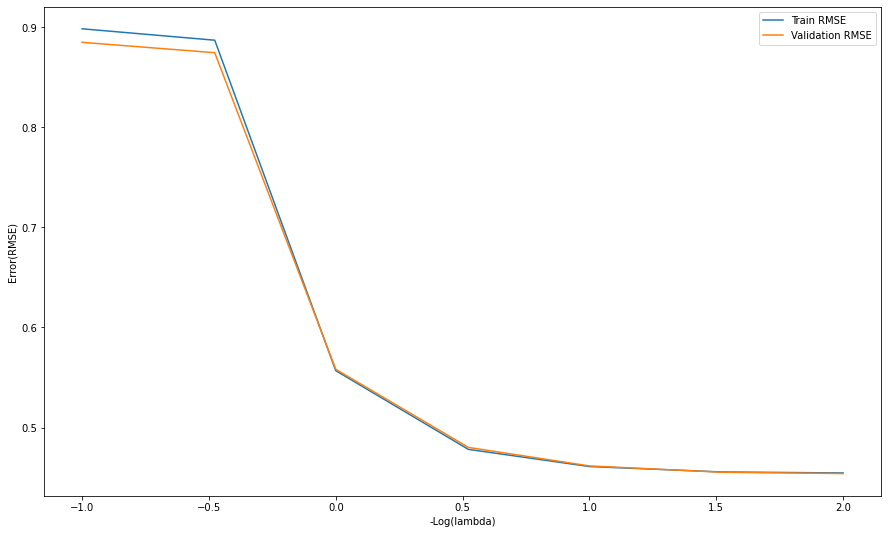

In [ ]:
plt.figure(figsize = (15,9))
plt.plot([-np.log10(i) for i in lambd],tr1_rmse,label='Train RMSE') # Plot of train RMSE vs -log(1/lambda)
plt.plot([-np.log10(i) for i in lambd],val1_rmse,label = 'Validation RMSE') # Plot of  validation RMSE vs -log(1/lambda)
plt.legend()
plt.xlabel('-Log(lambda)')
plt.ylabel('Error(RMSE)')
plt.show()

We see a relatively steep drop in rate of change of both training and validation error at log($\frac{1}{λ}$) = 1 (λ = 0.1). After this value, increase in complexity doesn't give much decrease in error. Hence we can consider 0.1 as best λ value.

However, the trend seems to be that error is decreasing with decrease in λ. We will investigate when lambda tends to 0 (no regularisation) below.

In [ ]:
print('Optimal weights are', ws[4]) #Weight vector corresponding to lambda = 0.1
print('Validation RMSE is', np.sqrt(MSE_Loss(x_val,y_val,ws[4])) ) #Validation RMSE
print('Validation NRMSE is',NRMSE_Metric(x_val,y_val,ws[4]) ) #Validation NRMSE

Optimal weights are [ 0.15147225  0.0657875   0.01259026 -0.02789402  0.40970632  0.16353676
 -0.12999231  0.08130783 -0.09632728 -0.07586443 -0.06703773 -0.06173716
 -0.01157219  0.05153122 -0.00325628 -0.00818385 -0.00633774 -0.02800727
 -0.05168436  0.06997345  0.03067963  0.00131424]
Validation RMSE is 0.46170745898219107
Validation NRMSE is 0.4683502471725136


Since target is normalised, standard deviation of validation set is close to 1, hence RMSE and NRMSE are close to one another 

## L1 Loss)

In [ ]:
weights_l1 = [] #creating an empty list to store weights for different lambda values in case of L1 Loss

for i in lambd: #runnin a loop over each value of lambda
  w, train_err, val_err, val_nrmse = Gradient_Descent(x_train, x_val, y_train, y_val, weights, i, 10000, 1e-10, 1e-2, L1_Loss, L1_Gradient) #running gradient descent for given dataset with max iterations 10000, epsilon=1e-10, learning rate=1e-3 and loss function L1 and storing the values returned
  weights_l1.append(w) #appending the list of weights for each value of lambda in weights_l1

In [ ]:
train_l1_rmse = [np.sqrt(MSE_Loss(x_train, y_train, weights_l1[i])) for i in range(7)] #calculating and storing rmse for training set for all values of lambda
val_l1_rmse = [np.sqrt(MSE_Loss(x_val, y_val, weights_l1[i])) for i in range(7)] #calculating and storing rmse for validation set for all values of lambda

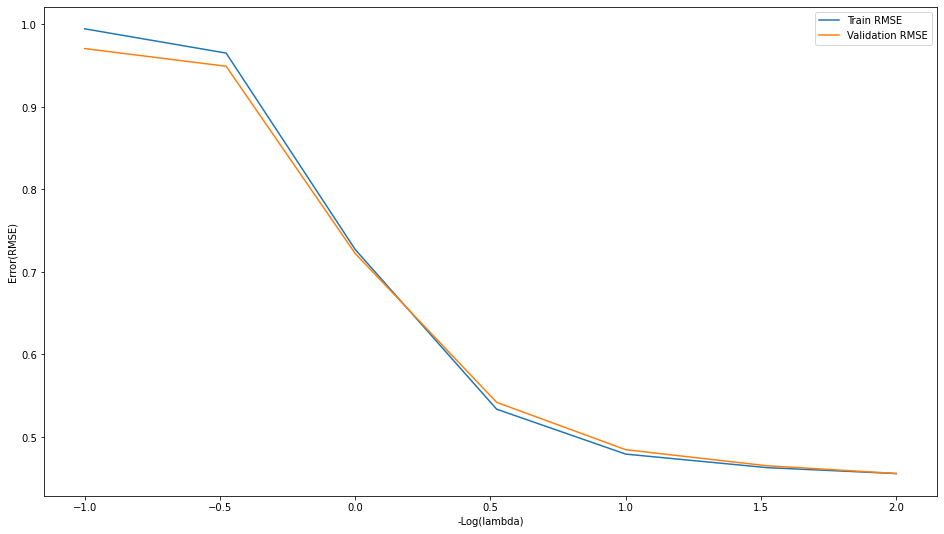

In [ ]:
plt.figure(figsize = (16,9)) #setting figure size for plot
plt.plot([-np.log10(i) for i in lambd], train_l1_rmse, label='Train RMSE') #plotting training rmse against log(1/lambda)
plt.plot([-np.log10(i) for i in lambd], val_l1_rmse, label = 'Validation RMSE') #plotting validation rmse against log(1/lambda)
plt.legend() #showing labels on plot
plt.xlabel('-Log(lambda)') #labelling x axis
plt.ylabel('Error(RMSE)') #labelling y axis
plt.show() #showing plot


We see a relatively steep drop in rate of change of both training and validation error at log( 1/λ ) = 1.5 (λ = 0.03). After this value, increase in complexity doesn't give much decrease in error. Hence we can consider 0.03 as best λ value.

However, the trend seems to be that error is decreasing with decrease in λ. We will investigate when lambda tends to 0 (no regularisation) below

In [ ]:
print('Optimal weights are', weights_l1[5],'\n') #printing weights for best lambda value
print('Validation RMSE is', val_l1_rmse[5],'\n') #printing validation rmse for best lambda value
print('Validation NRMSE is',NRMSE_Metric(x_val, y_val, weights_l1[5])) #printing normalized validation rmse for best lambda value

Optimal weights are [ 1.64306411e-01  4.07952923e-02  6.23604763e-03 -3.40472842e-05
  5.30254839e-01  1.06644116e-01 -1.14113057e-01  6.94819697e-02
 -8.22158597e-02 -3.24518693e-02 -3.19355668e-02 -5.93106234e-02
 -4.38562014e-05  2.54351729e-02 -4.17985473e-05 -3.70206889e-06
 -3.81581427e-05 -3.12355987e-02 -4.80257643e-03  2.64510263e-02
  3.98664043e-03  2.14853739e-03] 

Validation RMSE is 0.46527327032991433 

Validation NRMSE is 0.4719673614157148


## Pseudo-inverse)

In [ ]:
wpsinv = [] #list to store weight vectors
for j in lambd: # iterating through chosen values of lambda
  w = Pseudo_Inverse(x_train,y_train,j*n) #Since lambda in our function is scaled down by n, we need to scale it back
  wpsinv.append(w)

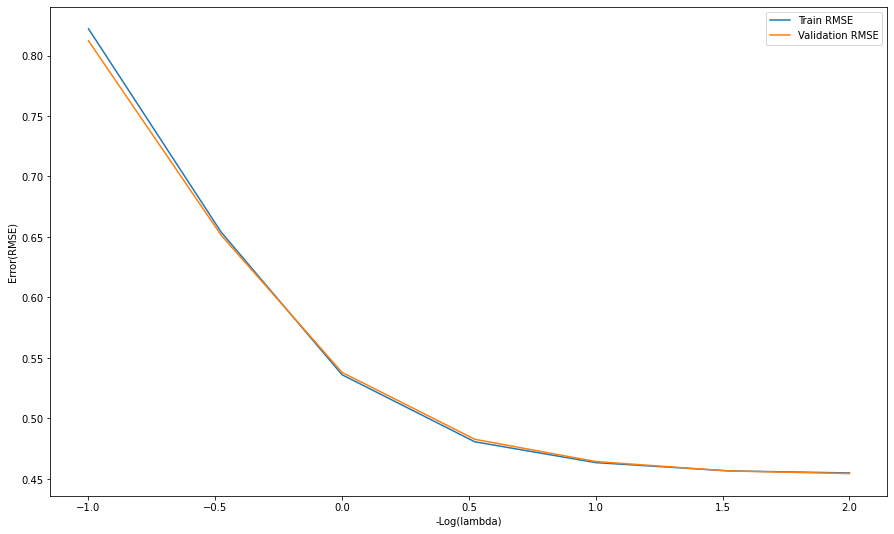

In [ ]:
tr_rmse = [np.sqrt(MSE_Loss(x_train,y_train,wpsinv[i])) for i in range(7)]#calculating and storing rmse for training set for all values of lambda

val_rmse = [np.sqrt(MSE_Loss(x_val,y_val,wpsinv[i])) for i in range(7)]  #calculating and storing rmse for validation set for all values of lambda


plt.figure(figsize = (15,9))
plt.plot([-np.log10(i) for i in lambd],tr_rmse,label='Train RMSE') #Plotting train rmse vs -log(1/lambda)
plt.plot([-np.log10(i) for i in lambd],val_rmse,label = 'Validation RMSE') #Plotting validation rmse vs -log(1/lambda)
plt.legend()
#plt.ylim([0,1])
plt.xlabel('-Log(lambda)')
plt.ylabel('Error(RMSE)')
plt.show()


We see a drop in rate of change of both training and validation error at log( 1/λ ) = 1 (λ = 0.1). After this value, increase in complexity doesn't give much decrease in error. Hence we can consider 0.1 as best λ value.

However, the trend seems to be that error is decreasing with decrease in λ. We will investigate when lambda tends to 0 (no regularisation) below

In [ ]:
print('Optimal weights are', wpsinv[4],'\n') #weights corresponding to lambda  0.1
print('Validation RMSE is', val_rmse[4],'\n') 
print('Validation NRMSE is',NRMSE_Metric(x_val, y_val, wpsinv[4]))

Optimal weights are [ 0.15130524  0.07120465 -0.00132728 -0.02678165  0.38335511  0.17085636
 -0.12821567  0.079018   -0.09610309 -0.07730116 -0.06971538 -0.06106417
 -0.0108048   0.04908917 -0.00273691 -0.00862557 -0.00543235 -0.02536851
 -0.04684672  0.06364798  0.03152548  0.00102218] 

Validation RMSE is 0.4643298262409339 

Validation NRMSE is 0.47101034358186505


## Gradient descent without regularisation

We will also check for $\lambda = 0$

In [40]:
wnr, train_err, val_err_gd, val_nrmse_gd = Gradient_Descent(x_train, x_val, y_train, y_val, weights, 0, 10000, 1e-10, 5e-3, MSE_Loss, MSE_Gradient) #doing gradient descent ith lambd = 0 i.e. without regularisation

In [41]:
print('Weights are', wnr,'\n') #printing weights for best lambda value
print('Validation RMSE is', np.sqrt(val_err_gd),'\n') #printing validation rmse for best lambda value
print('Validation NRMSE is',val_nrmse_gd) #printing normalized validation rmse for best lambda value

Weights are [ 0.15852088  0.04445756  0.13448    -0.04443859  0.59763031  0.06231221
 -0.13292205  0.08456853 -0.08860529 -0.06466526 -0.05043857 -0.07201824
 -0.01773328  0.05444255 -0.01170899 -0.00649785 -0.01399681 -0.04178032
 -0.07314503  0.09443113  0.01737296  0.00208611] 

Validation RMSE is 0.4537162018538185 

Validation NRMSE is 0.4602440163146821


We can observe that the validation error is smaller for $\lambda = 0$ i.e. gradient descent without regularisation.

So, we can conclude that the best $\lambda$ for the given problem is $0$.

#Testing

In [26]:
test_df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv') #importing test file from given url using pandas

In [46]:
test_df = Normalize(test_df) #normalising test dataframe
pred_arr = Prediction(test_df, wnr) #predicting the target column for test data using prediction function and optimal weights
pred_arr = pred_arr*stdy + my #de-normalising predicted array
pred_df = pd.DataFrame(pred_arr,columns=['Next_Tmax']) #creating a dataframe of the predicted vector array
#pred_df.to_csv('21i190008_21i190012_1.csv',index=False) #converting dataframe to csv and saving it

In [47]:
pred_df.describe() #descriptive statistics for predicted column

,Next_Tmax
count,1506.000000
mean,30.309518
std,2.974732
min,21.047569
25%,28.128438
50%,30.834144
75%,32.455126
max,37.316337


In [ ]:
df1.Next_Tmax.describe() #descriptive statistics for training column

count    6082.000000
mean       30.303058
std         3.097031
min        17.400000
25%        28.400000
50%        30.500000
75%        32.600000
max        38.900000
Name: Next_Tmax, dtype: float64

## Predicted vs actual values

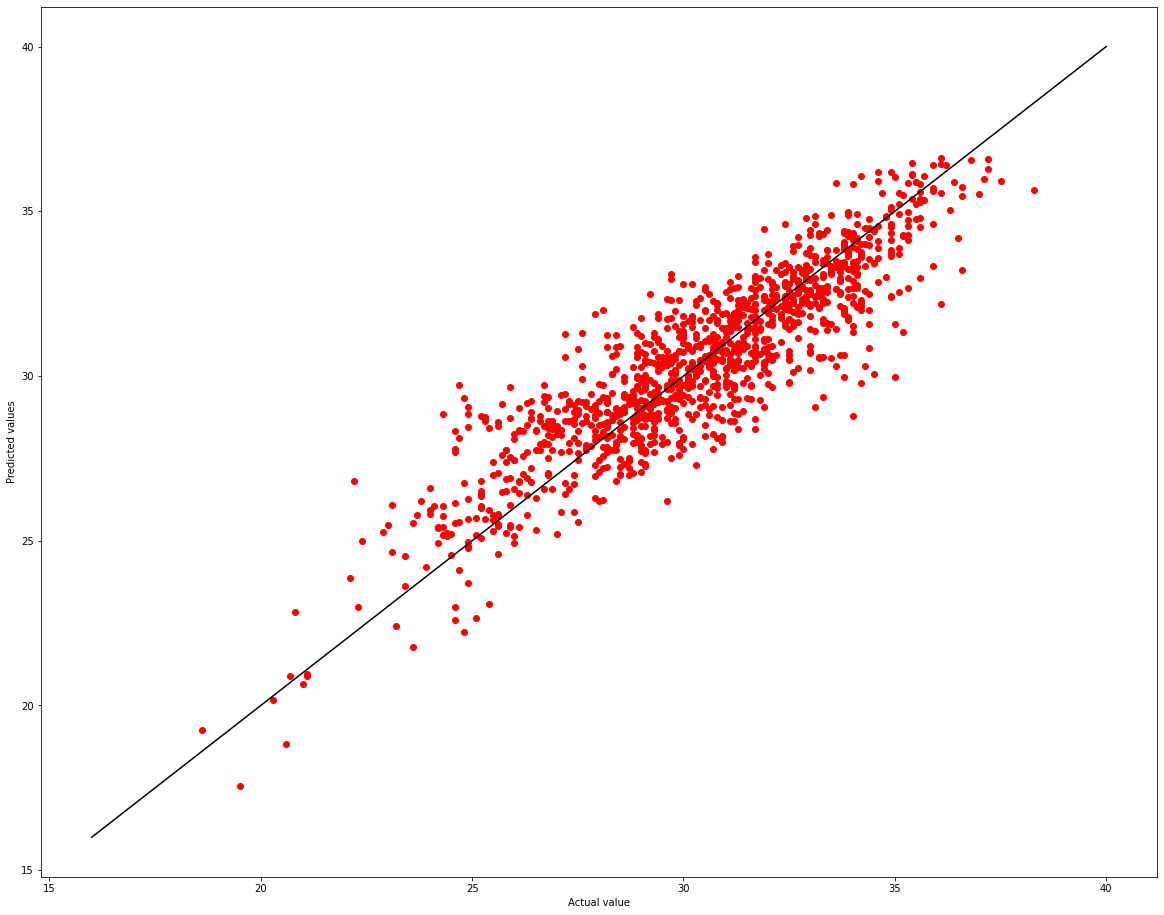

In [ ]:
preds = Prediction(x_val,wnr)*stdy+my #storing de-normalised array in preds
y_or = y_val*stdy+my #de-normalised y validation dataset
I = np.linspace(16,40,200) #storing 200 points in the range of minimum Next_T_Max and maximum Next_t_Max
plt.figure(figsize = (20,16)) #setting figure size
plt.scatter(y_or,preds,color='red') #scatter plot of predicted vs actual values
plt.plot(I,I,color='black') #Identity function, to visualise difference

plt.xlabel('Actual value') #labelling x axis
plt.ylabel('Predicted values') #labelling y axis
plt.show() 

### R^2

In [ ]:
corr_matrix = np.corrcoef(preds,y_or) #calculating the correlation coefficient matrix
corr_coeff = corr_matrix[0][1] #storing the correlation between the two array

print('The R^2 value for the predicted vs actual data is', corr_coeff**2) #calculating R^2 by taking the square of corr_coeff

The R^2 value for the predicted vs actual data is 0.788315744202502


#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): Siddarth Jain 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 
https://en.wikipedia.org/wiki/Root-mean-square_deviation


Sources :

For help regarding some numpy functions : https://numpy.org/doc/stable/reference/

For clearing doubts regarding the gradient descent function : https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21

To check R^2 : https://condor.depaul.edu/sjost/it223/documents/correlation.htm
